In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [13]:
df = pd.read_csv('Preprocessed_Dataset.csv')


In [15]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [16]:
df.dropna(inplace=True)

In [17]:
df['length'] = df['text_'].apply(len)

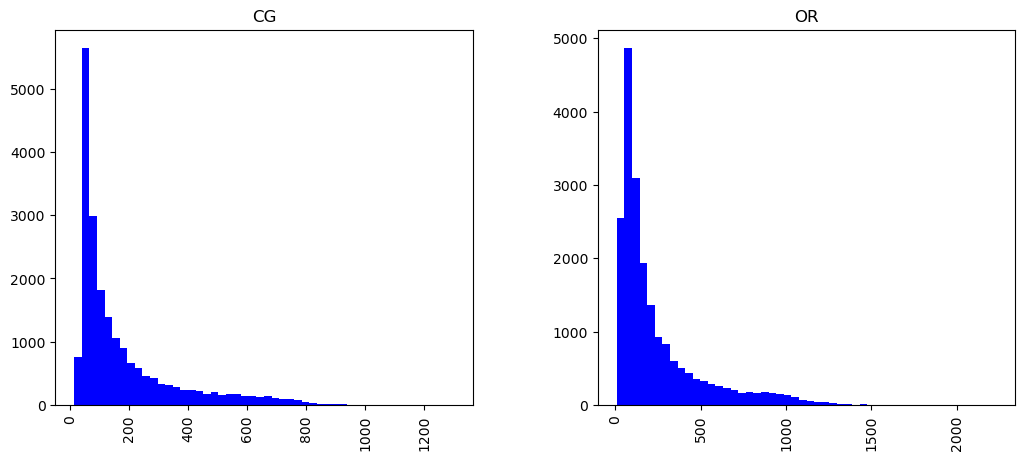

In [18]:
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

Let's extract the largest review...

In [19]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

"weak on current scienc after see twice i agre much posit five star review out respect read review i 'll repeat everyth i like present i found goofi over ear hairdo facial hair arrang daniel vitali describ `` wild food expert '' distract ugh ditto david wolf extrem goofi wild hairdo on hand jon gabriel describ `` author weight loss expert '' nice groom good present hi stori person transform fellow pound whew becom jock normal weight inspir christian northrup preserv rank one america 's cutest doctor a realli nice look woman present dr. mercola jason vale kri carr alejandro junger fine it disappoint jami oliv popular uk give babi cow growth fluid pas unscientif popular idea milk none present anyth zilch say work doctor t. colin campbel milk bodi bad it good see present take stand sugar they agre evil sugar refin carbohydr with respect dr. northrup `` it 's fat make fat 's sugar '' statement pas muster commun expert recogn evil sugar not mutual exclus recogn proven danger fat particularl

In [20]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [21]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x28d68bec0>)

In [22]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 34450


There are 6 unique words in the 4th review.

In [26]:
bow_reviews = bow_transformer.transform(df['text_'])

In [28]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


In [30]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)

In [31]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.91422964906803
2.821684385176731


In [32]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)

## Creating training and testing data

In [33]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.30)

## Training and testing SVC Algorithm on the preprocessed data

In [34]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [35]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x28d68bec0>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [36]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['OR', 'CG', 'OR', ..., 'OR', 'OR', 'CG'], dtype=object)

In [37]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.89      0.87      0.88      6093
          OR       0.87      0.89      0.88      6037

    accuracy                           0.88     12130
   macro avg       0.88      0.88      0.88     12130
weighted avg       0.88      0.88      0.88     12130

Confusion Matrix: [[5277  816]
 [ 652 5385]]
Accuracy Score: 0.8789777411376752
Model Prediction Accuracy: 87.9%


# Conclusion

In [38]:
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Support Vector Machines Prediction Accuracy: 87.9%


In [39]:
def predict_category(text):
    preprocessed_text = text_process(text)
    prediction = pipeline.predict([preprocessed_text])[0]
    return prediction

In [56]:
text_to_check = "thi rug amaz price qualiti i purchas future.i bought friend love it 's great store fruit veggi fridg she use frozen strawberri chop"
category_prediction = predict_category(text_to_check)
print("Predicted Category:", category_prediction)

Predicted Category: OR
